In [1]:
from tools import data_parser as dp
import joblib
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from statistics import mean
from randomforest import random_forest_CV
from data_visualisation import rf_vis
from sklearn.metrics import mean_absolute_error
from scipy import stats

ModuleNotFoundError: No module named 'data_parser'

In [2]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [3]:
bert_data = "./data/combined_bert_df.csv"
df = pd.read_csv(bert_data)

light, heavy, temp = dp.data_extract_Jain('./data/combined_datasets.csv')

X = df
Y = temp

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

In [5]:
print(mean(y_train))

71.30212765957447


In [6]:
a = random_forest_CV.grid_search(x_train,y_train,random_grid,100,3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [7]:
result = random_forest_CV.evaluate(a,x_test,y_test)

Model Performance
---------------------
Average Error: 4.36 degrees.


In [8]:
print (result)

Pearson Coeff: 0.56


In [11]:
# Save the model to a file
joblib.dump(a, './models/250123_RF.joblib')


# Create a dictionary with the relevant information
data = {
    'Dataset': ['combined_bert'],
    'Model': ['Random Forest Regression with GridSearchCV'],
    'Model File': ['250123_RF.joblib'],
    'Pearson': [result]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Save the dataframe to a CSV file
df.to_csv('./models/results.csv', index=False)

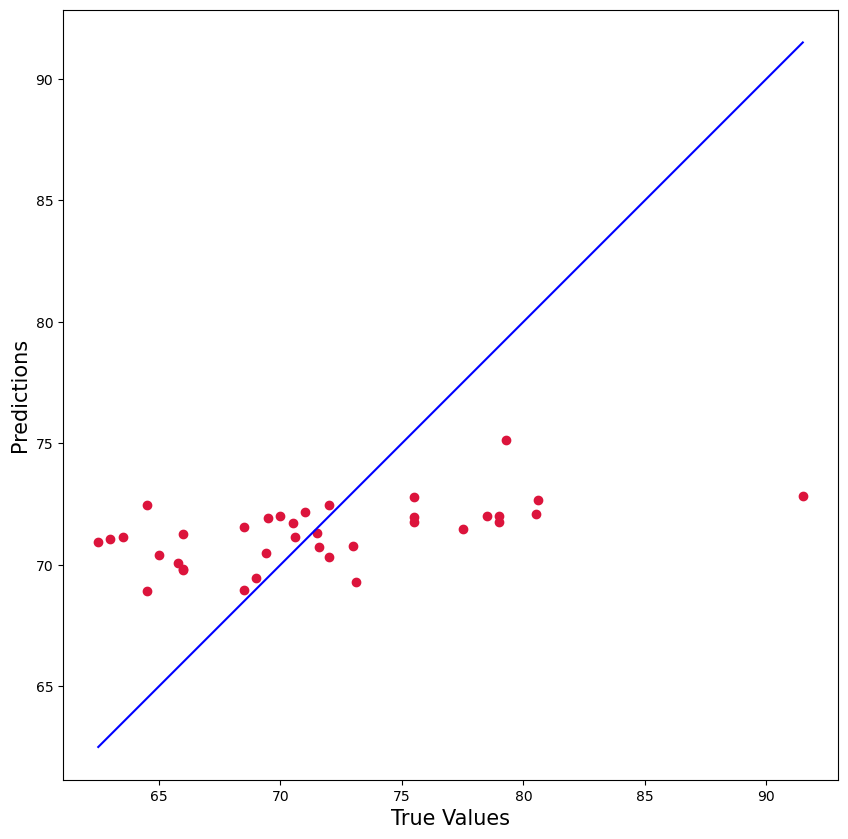

In [6]:
model = joblib.load('./models/250123_RF.joblib')
rf_vis.rf_plot(x_test, y_test, model)

Next step is to determine if the model performs better than just taking the average.

In [9]:
avg_temp = mean(y_test)
avg_list =[]
for i in range(len(y_test)):
    avg_list.append(avg_temp)
errors = mean_absolute_error(y_test, avg_list)
r2 = stats.pearsonr(avg_list, y_test)
print('Model Performance\n---------------------')
print('Average Error: {:0.2f} degrees.'.format(np.mean(errors)))
print (r2)
print('Pearson Coeff: {:0.2f}'.format(r2[0]))


Model Performance
---------------------
Average Error: 4.88 degrees.
PearsonRResult(statistic=nan, pvalue=nan)
Pearson Coeff: nan


C:\Users\toon_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
